In [24]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [26]:
data = pd.read_csv("data.csv")
data = data.rename(columns={"1990":pd.to_datetime("1990"),
                            "1991":pd.to_datetime("1991"),
                            "1992":pd.to_datetime("1992"),
                            "1993":pd.to_datetime("1993"),
                            "1994":pd.to_datetime("1994"),
                            "1995":pd.to_datetime("1995"),
                            "1996":pd.to_datetime("1996"),
                            "1997":pd.to_datetime("1997"),
                            "2005":pd.to_datetime("2005"),
                            "2006":pd.to_datetime("2006"),
                            "2007":pd.to_datetime("2007"),
                            "2008":pd.to_datetime("2008"),})
for i in ["1998","1999","2000","2001","2002","2003","2004",]:
    data[pd.to_datetime(i)] = "-" 
data = data.replace("-",np.nan)

In [27]:
df = pd.DataFrame()
for index, row in data.iterrows():
    try:
        df = df.append(row[2:].astype(float).interpolate(method="polynomial", order=2),ignore_index=True)
    except Exception as e:
        print(e)

The number of derivatives at boundaries does not match: expected 1, got 0+0


In [44]:
df["Crop"] = data["Crop"]
df["State"] = data["State"]
data = df
withNaData = df
#data = data.dropna()

In [45]:
paddy = data.loc[data['Crop']=='Paddy']
jowar = data.loc[data['Crop']=='Jowar']
bajra = data.loc[data['Crop']=='Bajra']
maize = data.loc[data['Crop']=='Maize']
ragi = data.loc[data['Crop']=='Ragi']
wheat = data.loc[data['Crop']=='Wheat']
barley = data.loc[data['Crop']=='Barley']
gram = data.loc[data['Crop']=='Gram']
urad = data.loc[data['Crop']=='Urad']
moong = data.loc[data['Crop']=='Moong']
arhar = data.loc[data['Crop']=='Arhar']
sunflower = data.loc[data['Crop']=='Sunflower']
groundnut = data.loc[data['Crop']=='Groundnut']
rapeseed_mustard = data.loc[data['Crop']=='Rapeseed & Mustard']
safflower = data.loc[data['Crop']=='Safflower']
soyabean = data.loc[data['Crop']=='Soyabean']
cotton = data.loc[data['Crop']=='Cotton']
onion = data.loc[data['Crop']=='Onion']
sugarcane = data.loc[data['Crop']=='Sugercane']


In [46]:
sugarcane["State"].values




array(['Andhra Pradesh', 'Bihar', 'Karnataka', 'Tamil Nadu'], dtype=object)

In [49]:
### Line Plot Common Code ####

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


'''fig = make_subplots(rows=4, cols=1,subplot_titles=sugarcane["State"].values,shared_yaxes=True)

for index in range(4):
    fig.add_trace(
        go.Scatter(x=sugarcane.columns,y=sugarcane.iloc[index]),
        row=index+1, col=1,
    )
    fig.update_yaxes(title_text="Price", row=index+1, col=1)
fig.show()'''

def ts_plotter(data=sugarcane,length=len(sugarcane),title="Sugarcane"):
    fig = go.Figure()
    for i in range(length):
        fig.add_trace(go.Scatter(x=data.columns, y=data.iloc[i],
                            mode='lines',
                            name=data.State.iloc[i]))
    fig.update_layout(height=500, width=700,
                      title_text=title)

    fig.show()
ts_plotter()

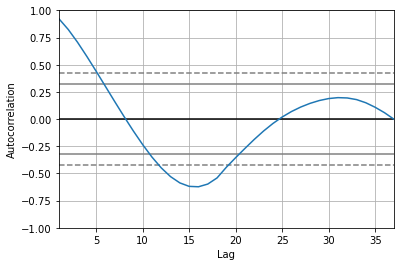

In [50]:
### Auto Correlation ###
def auto_corr_plot(data=sugarcane,index=3):
    ts_1 = data.iloc[index].values
    ts_1 = ts_1[:-2]
    ts_1 = ts_1.astype("float")
    result = np.correlate(ts_1,ts_1,mode="full")
    auto_corr = result[result.size//2:]
    from pandas.plotting import autocorrelation_plot
    autocorrelation_plot(result)
auto_corr_plot()

In [51]:
fig = px.bar(x=data.State.value_counts().index,y=data.State.value_counts().values)
fig.update_xaxes(title_text="State")
fig.update_yaxes(title_text="Population")


In [52]:
single_line = sugarcane.loc[sugarcane["State"]=="Andhra Pradesh"]
single_line

,1990-01-01 00:00:00,1991-01-01 00:00:00,1992-01-01 00:00:00,1993-01-01 00:00:00,1994-01-01 00:00:00,1995-01-01 00:00:00,1996-01-01 00:00:00,1997-01-01 00:00:00,1998-01-01 00:00:00,1999-01-01 00:00:00,...,2001-01-01 00:00:00,2002-01-01 00:00:00,2003-01-01 00:00:00,2004-01-01 00:00:00,2005-01-01 00:00:00,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,Crop,State
51,27.23,22.942,25.36,34.518198,43.72,47.42,51.912325,58.265879,66.445943,76.467353,...,98.898629,104.939518,106.4878,103.543476,96.08,89.0,106.06,119.72,Sugercane,Andhra Pradesh


#Prediction Time

In [53]:
sl = single_line
for i in range(2009,2019):
    sl[pd.to_datetime(str(i))]  = np.NAN
sl.iloc[0]


d:\trials\agricult\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1990-01-01 00:00:00             27.23
1991-01-01 00:00:00            22.942
1992-01-01 00:00:00             25.36
1993-01-01 00:00:00           34.5182
1994-01-01 00:00:00             43.72
1995-01-01 00:00:00             47.42
1996-01-01 00:00:00           51.9123
1997-01-01 00:00:00           58.2659
1998-01-01 00:00:00           66.4459
1999-01-01 00:00:00           76.4674
2000-01-01 00:00:00           88.3301
2001-01-01 00:00:00           98.8986
2002-01-01 00:00:00            104.94
2003-01-01 00:00:00           106.488
2004-01-01 00:00:00           103.543
2005-01-01 00:00:00             96.08
2006-01-01 00:00:00                89
2007-01-01 00:00:00            106.06
2008-01-01 00:00:00            119.72
Crop                        Sugercane
State                  Andhra Pradesh
2009-01-01 00:00:00               NaN
2010-01-01 00:00:00               NaN
2011-01-01 00:00:00               NaN
2012-01-01 00:00:00               NaN
2013-01-01 00:00:00               NaN
2014-01-01 0

In [54]:
def interpolate_further(data):
    #print(data.head())
    timeData = data.drop(["State","Crop"],axis=1)
    # for i in range(2009,2019):
    #     timeData[pd.to_datetime(str(i))]  = np.NAN
    for i in range(1998,2004):
            timeData[pd.to_datetime(str(i))]  = np.NAN
    df = pd.DataFrame()
    error_index = []
    for index, row in timeData.iterrows():
        try:
            df = df.append(row.astype(float).interpolate(method="polynomial", order=2),ignore_index=True)
        except Exception as e:
            print(data.iloc[index]["State"],data.iloc[index]["Crop"],"Error: ",e)
            error_index.append(index)
    return df,error_index


In [55]:
newdf,error_index = interpolate_further(data)
error_index

[]

In [56]:
data.iloc[1]

1990-01-01 00:00:00     221.36
1991-01-01 00:00:00    256.512
1992-01-01 00:00:00    287.987
1993-01-01 00:00:00    315.856
1994-01-01 00:00:00    339.967
1995-01-01 00:00:00    360.402
1996-01-01 00:00:00     377.16
1997-01-01 00:00:00    390.272
1998-01-01 00:00:00    399.666
1999-01-01 00:00:00    405.384
2000-01-01 00:00:00    407.425
2001-01-01 00:00:00    407.453
2002-01-01 00:00:00    415.464
2003-01-01 00:00:00    433.113
2004-01-01 00:00:00      460.4
2005-01-01 00:00:00     497.44
2006-01-01 00:00:00        519
2007-01-01 00:00:00     435.48
2008-01-01 00:00:00     584.82
Crop                     Paddy
State                    Bihar
Name: 1, dtype: object

In [74]:
newdf.iloc[0]

1990-01-01    216.130000
1991-01-01    256.003663
1992-01-01    290.220720
1993-01-01    318.851650
1994-01-01    341.740000
1995-01-01    363.600000
1996-01-01    405.820000
1997-01-01    436.720000
1998-01-01    461.077571
1999-01-01    480.873885
2000-01-01    496.108941
2001-01-01    507.265519
2002-01-01    517.028915
2003-01-01    525.889395
2004-01-01    533.846957
2005-01-01    540.960000
2006-01-01    557.000000
2007-01-01    638.560000
2008-01-01    789.900000
Name: 0, dtype: float64

In [78]:
train = newdf.iloc[0].values
model = AutoReg(train, lags=2)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [-65.96373402   2.71984709  -1.59172635]


In [81]:
predictions = model_fit.predict(start=len(train), end=len(train)+10-1, dynamic=False)

In [82]:
predictions

array([  1066.0307025 ,   1576.17212353,   2524.15426627,   4290.51519368,
         7585.81866079,  13736.97696488,  25221.96560019,  46668.4177287 ,
        86718.52903697, 161511.82464646])

In [90]:
def predict(train_df,index):
    try:
        model = AutoReg(train_df.values, lags=3)
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(train), end=len(train)+10-1, dynamic=False)
        for i,j in zip(range(2009,2019),predictions):
            train_df[pd.to_datetime(str(i))]= j
        return train_df
    except Exception as e:
        print("error at index",index,": ",e,'.\nSet lag to 1')
        model = AutoReg(train_df.values, lags=1)
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(train), end=len(train)+10-1, dynamic=False)
        for i,j in zip(range(2009,2019),predictions):
            train_df[pd.to_datetime(str(i))]= j
        return train_df

In [91]:
allnarowremdf = newdf.dropna(how='all')
only_na = ~df.index.isin(allnarowremdf.index)
error_index = []
for index,val in enumerate(only_na):
    if val:
        error_index.append(index)
print(error_index)
pred_df = pd.DataFrame()
for index,row in allnarowremdf.iterrows():
    row = row.dropna()
    tt = predict(row,index)
    pred_df = pred_df.append(tt)
#tt = predict(newdf.iloc[0])
#tt

[27, 37, 47]
error at index 13 :  The model specification cannot be estimated. The model contains 4 regressors (1 trend, 0 seasonal, 3 lags) but after adjustment for hold_back and creation of the lags, there are only 1 data points available to estimate parameters. .
Set lag to 1


In [92]:
allnarowremdf

,1990-01-01,1991-01-01,1992-01-01,1993-01-01,1994-01-01,1995-01-01,1996-01-01,1997-01-01,1998-01-01,1999-01-01,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01
0,216.13,256.003663,290.220720,318.851650,341.740000,363.600000,405.820000,436.720000,461.077571,480.873885,496.108941,507.265519,517.028915,525.889395,533.846957,540.960000,557.000000,638.56,789.90
1,221.36,256.511716,287.986687,315.856021,339.967426,360.402086,377.160000,390.271957,399.666306,405.383909,407.424767,407.452867,415.463506,433.112508,460.399870,497.440000,519.000000,435.48,584.82
2,212.89,241.090000,300.490000,367.057840,413.380000,416.746532,424.680000,477.120000,527.597967,567.418976,596.583028,615.572802,626.952024,631.227703,628.399839,618.450000,609.000000,676.86,1021.90
3,230.54,328.930000,295.410000,306.465261,331.090000,327.450000,389.440000,444.770000,494.756578,542.470204,587.910879,630.063930,661.950940,682.575780,691.938447,689.920000,695.000000,783.31,745.22
4,194.69,206.770000,224.380000,266.870000,290.360000,330.810000,344.810000,356.400000,372.838620,394.443385,421.214296,451.444012,474.204911,487.795139,492.214697,487.280000,477.000000,505.92,669.86
5,203.13,233.880000,260.700000,277.690922,283.771500,290.472302,309.200000,337.910000,362.659224,381.275593,393.759108,402.533830,421.976421,454.501421,500.108832,559.190000,615.000000,600.73,732.62
6,250.27,313.154837,359.530000,389.454684,428.310000,489.240000,537.350000,754.060000,912.734001,969.842132,925.384390,798.257805,705.246209,665.313049,678.458327,746.640000,898.000000,1166.40,1102.37
7,219.19,341.250000,285.330000,289.009287,340.920000,400.900000,510.010000,555.910000,591.315334,629.000821,668.966462,709.520756,739.629253,757.613937,763.474808,757.020000,724.000000,672.98,1123.22
8,NaN,1306.420000,1342.917782,1367.975670,1381.456735,1383.445186,1373.941021,1352.870930,1320.350050,1276.336554,1220.830444,1153.632374,1075.109547,985.094105,883.586049,770.260000,706.000000,956.40,1007.52
9,228.26,313.510000,263.770000,196.864337,274.620000,534.310000,441.400000,398.670000,408.636689,456.930596,543.551721,659.375211,746.909028,797.027071,809.729340,782.210000,710.909309,678.98,769.59


In [93]:
correct_croplist = data["Crop"].drop(error_index)
correct_states = data["State"].drop(error_index)
print(len(correct_croplist))
print(len(correct_states))
pred_df["Crop"] = correct_croplist
pred_df["State"] = correct_states

54
54


In [94]:
pred_df

,1990-01-01 00:00:00,1991-01-01 00:00:00,1992-01-01 00:00:00,1993-01-01 00:00:00,1994-01-01 00:00:00,1995-01-01 00:00:00,1996-01-01 00:00:00,1997-01-01 00:00:00,1998-01-01 00:00:00,1999-01-01 00:00:00,...,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00,Crop,State
0,216.13,256.003663,290.220720,318.851650,341.740000,363.600000,405.820000,436.720000,461.077571,480.873885,...,1495.524384,1.738055e+03,1.958265e+03,2.157845e+03,2.351437e+03,2.563562e+03,2.823432e+03,3.159029e+03,Paddy,Andhra Pradesh
1,221.36,256.511716,287.986687,315.856021,339.967426,360.402086,377.160000,390.271957,399.666306,405.383909,...,250.960803,8.903254e+02,-3.116816e+01,1.312320e+03,-6.324872e+02,2.195253e+03,-1.905012e+03,4.050541e+03,Paddy,Bihar
2,212.89,241.090000,300.490000,367.057840,413.380000,416.746532,424.680000,477.120000,527.597967,567.418976,...,7301.730757,1.398019e+04,2.632853e+04,4.909893e+04,9.114788e+04,1.689862e+05,3.133775e+05,5.816033e+05,Paddy,Haryana
3,230.54,328.930000,295.410000,306.465261,331.090000,327.450000,389.440000,444.770000,494.756578,542.470204,...,797.186577,8.125555e+02,8.272213e+02,8.411715e+02,8.544457e+02,8.670754e+02,8.790919e+02,8.905250e+02,Paddy,Madhya Pradesh
4,194.69,206.770000,224.380000,266.870000,290.360000,330.810000,344.810000,356.400000,372.838620,394.443385,...,884.544564,4.905805e+02,1.819898e+02,3.972662e+02,1.264256e+03,2.266230e+03,2.418739e+03,1.075853e+03,Paddy,Punjab
5,203.13,233.880000,260.700000,277.690922,283.771500,290.472302,309.200000,337.910000,362.659224,381.275593,...,866.146521,1.002326e+03,1.041675e+03,1.188211e+03,1.255971e+03,1.418433e+03,1.518216e+03,1.702970e+03,Paddy,Uttar Pradesh
6,250.27,313.154837,359.530000,389.454684,428.310000,489.240000,537.350000,754.060000,912.734001,969.842132,...,675.301231,7.411057e+02,8.233937e+02,8.623262e+02,8.508210e+02,8.170472e+02,7.917157e+02,7.873881e+02,Jowar,Andhra Pradesh
7,219.19,341.250000,285.330000,289.009287,340.920000,400.900000,510.010000,555.910000,591.315334,629.000821,...,1022.698065,1.151193e+03,9.528518e+02,9.934862e+02,1.176377e+03,1.107970e+03,1.042210e+03,1.168002e+03,Jowar,Madhya Pradesh
8,NaN,1306.420000,1342.917782,1367.975670,1381.456735,1383.445186,1373.941021,1352.870930,1320.350050,1276.336554,...,2951.715704,2.556593e+03,4.322239e+03,2.394943e+03,5.053592e+03,-2.374323e+02,4.784370e+03,-6.840964e+03,NaN,NaN
9,228.26,313.510000,263.770000,196.864337,274.620000,534.310000,441.400000,398.670000,408.636689,456.930596,...,785.645499,7.997416e+02,8.167226e+02,8.221878e+02,8.232319e+02,8.275562e+02,8.338573e+02,8.386425e+02,Bajra,Haryana


#Mass Plotting

In [95]:
paddy = pred_df.loc[pred_df['Crop']=='Paddy']
jowar = pred_df.loc[pred_df['Crop']=='Jowar']
bajra = pred_df.loc[pred_df['Crop']=='Bajra']
maize = pred_df.loc[pred_df['Crop']=='Maize']
ragi = pred_df.loc[pred_df['Crop']=='Ragi']
wheat = pred_df.loc[pred_df['Crop']=='Wheat']
barley = pred_df.loc[pred_df['Crop']=='Barley']
gram = pred_df.loc[pred_df['Crop']=='Gram']
urad = pred_df.loc[pred_df['Crop']=='Urad']
moong = pred_df.loc[pred_df['Crop']=='Moong']
arhar = pred_df.loc[pred_df['Crop']=='Arhar']
sunflower = pred_df.loc[pred_df['Crop']=='Sunflower']
groundnut = pred_df.loc[pred_df['Crop']=='Groundnut']
rapeseed_mustard = pred_df.loc[pred_df['Crop']=='Rapeseed & Mustard']
safflower = pred_df.loc[pred_df['Crop']=='Safflower']
soyabean = pred_df.loc[pred_df['Crop']=='Soyabean']
cotton = pred_df.loc[pred_df['Crop']=='Cotton']
onion = pred_df.loc[pred_df['Crop']=='Onion']
sugarcane = pred_df.loc[pred_df['Crop']=='Sugercane']

In [96]:
ts_plotter(data=sugarcane,length=len(sugarcane.index),title="Sugarcane")

